In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Melbourne_housing_FULL.csv")

In [4]:
df.isnull().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Before making pairplots and conduct exploratory analysis, we should deal with missing values

In [5]:
#Distance and Postcode- There is only one row in the entire dataset which has not only distance and postcode missing,other house
#detainls as well. In ordinary case, variable such as distance can be imputed with mean of the column but having no info
#about council area, region etc cannot be reversed so it seems no harm in removing that one row from the dataframe

#Price- Remove Rows containing missing values
#df=df[df.Postcode.notnull()]

In [6]:
#Price- Remove Rows containing missing values
df=df[df.Price.notnull()]
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

### Rooms /Bedrooms/Bathrooms

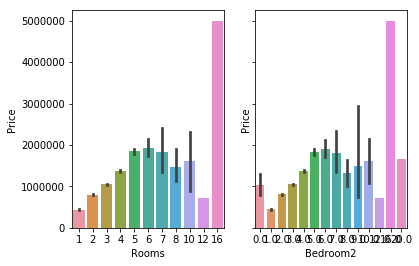

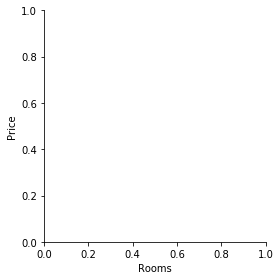

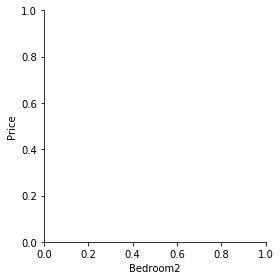

In [7]:
df_nobed= df[df.Bedroom2.notnull()]

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.factorplot(x="Rooms", y="Price",  data=df_nobed, kind="bar", ax = ax1)
sns.factorplot(x="Bedroom2", y="Price",  data=df_nobed, kind="bar",ax = ax2)
plt.show()

c:\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


"import matplotlib.pyplot as plt\nfig, ax =plt.subplots(1,2)\n\nfacet = sns.lmplot(data=df, x='Rooms', y='Price', hue='Regionname', \n                   fit_reg=False, legend=True, legend_out=True)\nfacet = sns.lmplot(data=df, x='Bedroom2', y='Price', hue='Type', \n                   fit_reg=False, legend=True, legend_out=True)\nfig.show()\n"

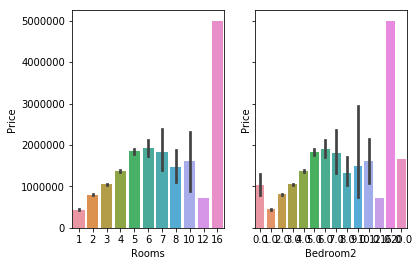

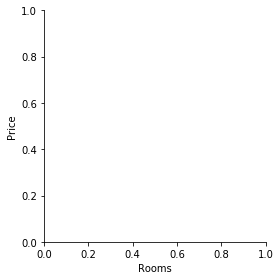

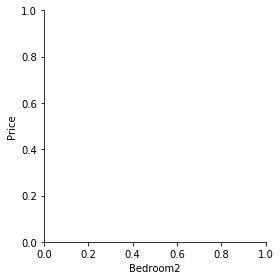

In [8]:

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.factorplot(x="Rooms", y="Price",  data=df_nobed, kind="bar", ax = ax1)
sns.factorplot(x="Bedroom2", y="Price",  data=df_nobed, kind="bar",ax = ax2)
fig.show()

"""import matplotlib.pyplot as plt
fig, ax =plt.subplots(1,2)

facet = sns.lmplot(data=df, x='Rooms', y='Price', hue='Regionname', 
                   fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=df, x='Bedroom2', y='Price', hue='Type', 
                   fit_reg=False, legend=True, legend_out=True)
fig.show()
"""

In [9]:
df.loc[df.Bathroom.isnull(), 'Bathroom']  = df.groupby('Rooms')['Bathroom'].transform(lambda x: x.fillna(x.mean()))
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [10]:
df.loc[df.Car.isnull(), 'Car']  = df.groupby('Type')['Car'].transform(lambda x: x.fillna(x.mean()))
df.loc[df.Landsize.isnull(), 'Landsize']  = df.groupby('Type')['Landsize'].transform(lambda x: x.fillna(x.mean()))

In [11]:

df.isnull().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom             1
Car                  0
Landsize             0
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [12]:
#RegionName, Council Area, Property count- two rows which have all of these values as missing. No way to determine the values
df=df[df.Regionname.notnull()]

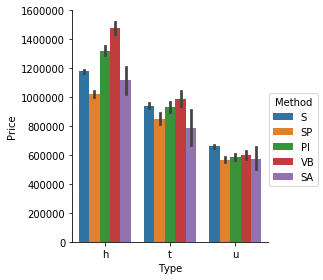

In [13]:
sns.factorplot(x="Type", y="Price", hue="Method", data=df, kind="bar");

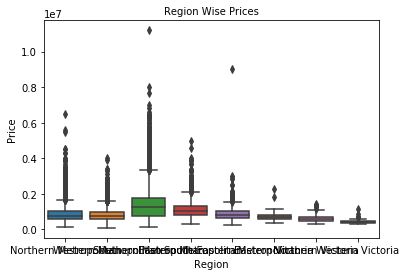

In [14]:
b=sns.boxplot(x="Regionname", y="Price", data=df, dodge=False);
b.axes.set_title("Region Wise Prices",fontsize=10)
b.set_xlabel("Region",fontsize=10)
b.set_ylabel("Price",fontsize=10)
b.tick_params(labelsize=10)

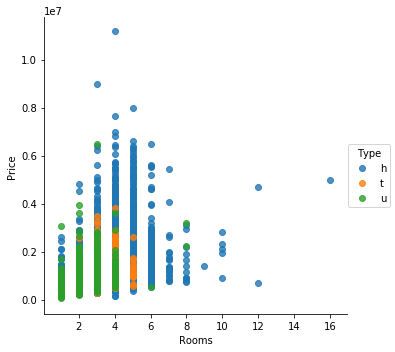

In [15]:
facet = sns.lmplot(data=df, x='Rooms', y='Price', hue='Type', 
                   fit_reg=False, legend=True, legend_out=True)

Preprocessing

In [16]:
df.groupby('Regionname')[['SellerG']].count()

,SellerG
Regionname,
Eastern Metropolitan,3272
Eastern Victoria,166
Northern Metropolitan,7864
Northern Victoria,166
South-Eastern Metropolitan,1341
Southern Metropolitan,8524
Western Metropolitan,5815
Western Victoria,96


In [17]:
df.groupby('Regionname', as_index=False).agg({"Car": "sum"})

,Regionname,Car
0,Eastern Metropolitan,5926.248011
1,Eastern Victoria,335.590006
2,Northern Metropolitan,12261.714606
3,Northern Victoria,346.327965
4,South-Eastern Metropolitan,2556.975491
5,Southern Metropolitan,13773.755843
6,Western Metropolitan,10231.900089
7,Western Victoria,193.718358


In [18]:
df.groupby('Regionname', as_index=False).agg({"Car": "sum",'SellerG': "count",'Rooms':sum})

,Regionname,Car,SellerG,Rooms
0,Eastern Metropolitan,5926.248011,3272,11010
1,Eastern Victoria,335.590006,166,584
2,Northern Metropolitan,12261.714606,7864,22055
3,Northern Victoria,346.327965,166,574
4,South-Eastern Metropolitan,2556.975491,1341,4358
5,Southern Metropolitan,13773.755843,8524,24735
6,Western Metropolitan,10231.900089,5815,17890
7,Western Victoria,193.718358,96,318


In [19]:
# Group the data frame by month and item and extract a number of stats from each group
df.groupby(['Regionname']).agg({'Rooms':sum,      # find the sum of the durations for each group
                                     'SellerG': "count" # find the number of network type entries
                                     })    # get the first date per group

,Rooms,SellerG
Regionname,,
Eastern Metropolitan,11010,3272
Eastern Victoria,584,166
Northern Metropolitan,22055,7864
Northern Victoria,574,166
South-Eastern Metropolitan,4358,1341
Southern Metropolitan,24735,8524
Western Metropolitan,17890,5815
Western Victoria,318,96


In [20]:
df=df[df.Bathroom.notnull()]
df['Bathroom'] = df['Bathroom'].apply(lambda x: round(x))
df['Car'] = df['Car'].apply(lambda x: round(x))

In [21]:
len(df)

27243

In [22]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6437
Bathroom             0
Car                  0
Landsize             0
BuildingArea     16587
YearBuilt        15159
CouncilArea          0
Lattitude         6250
Longtitude        6250
Regionname           0
Propertycount        0
dtype: int64

In [23]:
# Get Months out of Dates
df['Date'] = pd.to_datetime(df['Date'])
column = df['Date']
fearure_col = pd.DataFrame({"month":column.dt.month})
df =  pd.concat([df,fearure_col], axis = 1)

In [24]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,month
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,3
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,4
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,4
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,1,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,4
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,2,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,4


In [25]:
df = df.drop(['BuildingArea','YearBuilt','Bedroom2','Address','Postcode'], axis = 1)

In [26]:
df.to_csv('data_feature_2.csv', encoding='utf-8', index=False)


In [27]:
df.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Bathroom            0
Car                 0
Landsize            0
CouncilArea         0
Lattitude        6250
Longtitude       6250
Regionname          0
Propertycount       0
month               0
dtype: int64

In [28]:
df.loc[df.Lattitude.isnull(), 'Lattitude']  = df.groupby('Suburb')['Lattitude'].transform(lambda x: x.fillna(x.mean()))
df.loc[df.Longtitude.isnull(), 'Longtitude']  = df.groupby('Suburb')['Longtitude'].transform(lambda x: x.fillna(x.mean()))

In [29]:
df=df.dropna(axis=0, how='any')

In [30]:
df.drop(['Suburb','SellerG'], axis=1,inplace=True)

In [31]:
df= pd.get_dummies(df, columns = ['Type','Method','CouncilArea','Regionname'])

In [32]:
df.drop(['Date'], axis=1,inplace=True)

In [33]:
df.to_csv('data_feature_3.csv', encoding='utf-8', index=False)

clustering primary

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
%matplotlib inline 

In [35]:
df_c=df
df_c.drop(['Price'], axis=1,inplace=True)

In [135]:
df_c.head()

,Rooms,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,month,Type_h,...,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,clusters
1,2,2.5,1,1,202.0,-37.7996,144.9984,4019.0,3,1,...,0,0,0,1,0,0,0,0,0,0
2,2,2.5,1,0,156.0,-37.8079,144.9934,4019.0,4,1,...,0,0,0,1,0,0,0,0,0,0
4,3,2.5,2,0,134.0,-37.8093,144.9944,4019.0,4,1,...,0,0,0,1,0,0,0,0,0,0
5,3,2.5,2,1,94.0,-37.7969,144.9969,4019.0,4,1,...,0,0,0,1,0,0,0,0,0,0
6,4,2.5,1,2,120.0,-37.8072,144.9941,4019.0,4,1,...,0,0,0,1,0,0,0,0,0,0


### To run Clustering of different features

In [184]:
### Uncomment each of the below. Plots saved in the Images/ path


#df_imp=df_c[['Rooms', 'Car']]
#df_imp=df_c[['Propertycount', 'Rooms']]

#df_imp=df_c[['Distance', 'Propertycount']]
df_imp=df_c[['Lattitude','Longtitude']]
from sklearn import preprocessing

x = df_imp #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [185]:
df.head()

,0,1
0,0.493080,0.521160
1,0.482609,0.516625
2,0.480842,0.517532
3,0.496486,0.519799
4,0.483492,0.517260


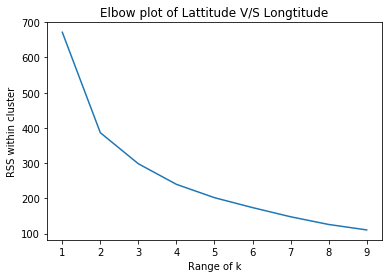

In [187]:
# Choosing the optimal k
from scipy.spatial.distance import cdist, pdist

k_range = range(1,10)
# Try clustering the data for k values ranging 1 to 10
k_means_var = [KMeans(n_clusters = k).fit(df) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]

k_euclid = [cdist(df, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# Calculate within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# Visualize the elbow method for determining k
import matplotlib.pyplot as plt
plt.plot(k_range, wcss)
plt.xlabel('Range of k')
plt.ylabel('RSS within cluster')
plt.title('Elbow plot of Lattitude V/S Longtitude')
plt.savefig('Images/Elbow_5')
plt.show()


In [189]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)
labels = kmeans.labels_
#Glue back to originaal data
df['clusters'] = labels
df2 = df.rename(columns = {0 : 'Lattitude', 1: 'Longtitude'})
#Add the column into our list

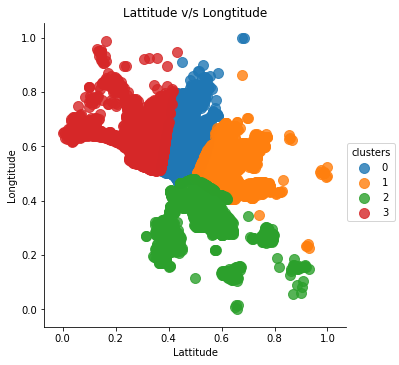

In [190]:
sns.lmplot('Lattitude', 'Longtitude', data = df2, fit_reg=False,hue="clusters",  scatter_kws={"marker": "D", "s": 100})
plt.title('Lattitude v/s Longtitude')
plt.xlabel('Lattitude')
plt.ylabel('Longtitude')
plt.savefig('Images/cluster_5.png')
plt.show()